In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
sys.path.append(os.path.realpath('..'))

import csrgraph
from csrgraph import glove
import nodevectors
import graph_eval

# To remove
import time
from sklearn import cluster, manifold, linear_model, metrics

In [11]:
# G, labels = graph_eval.make_karateclub()
# G, labels = graph_eval.make_blogcatalog(dedupe=True)
G, labels = graph_eval.cluster_graph(n_nodes=60, n_clusters=5, connections=10, drop_pct=0.3)
# G, labels = graph_eval.make_snap()

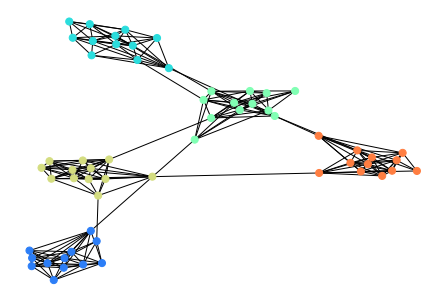

In [31]:
def draw_weights(w):
    to_draw = pd.DataFrame(w).reset_index(drop=False)
    to_draw.columns = ['idx', 'x', 'y']
    sns.scatterplot('x', 'y', data=to_draw, 
        hue='idx', palette=node_palette, legend=False)
    plt.show()

y = labels.label
n_clusters = y.nunique()

# Gridsearch result table
res = pd.DataFrame(columns=['method', 'params', 'traintime', 
                            'F1', 'F1_test', 'MI', 'RAND', 'F-M'])

X_train, X_test, y_train, y_test = train_test_split(
    labels.node, labels.label, test_size=0.10, 
    random_state=33)

palette = sns.color_palette('rainbow', labels.label.nunique())
node_palette = list(labels.label.map(lambda x: palette[x]))
nx.draw_spring(G, node_size=50, node_color=node_palette)

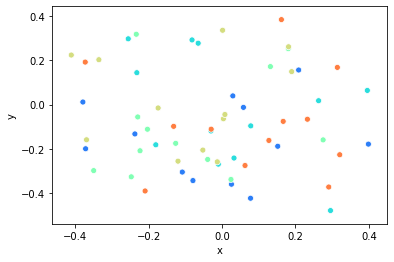

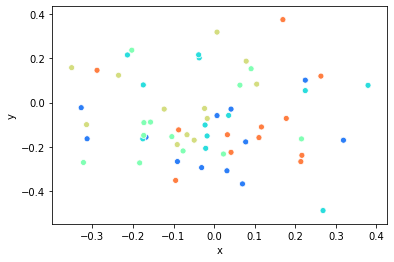

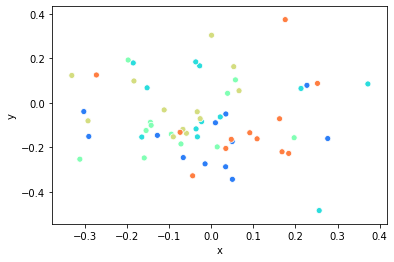

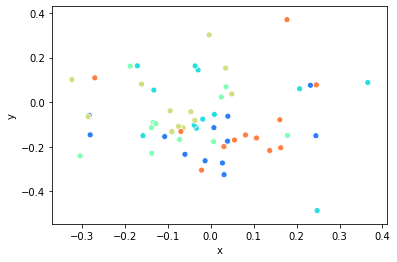

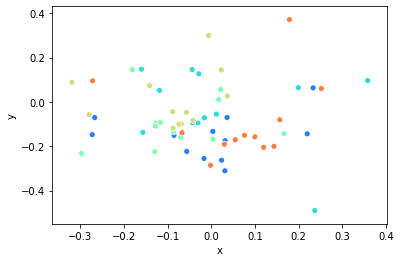

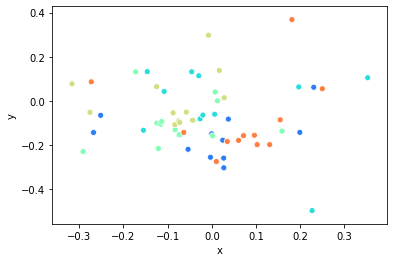

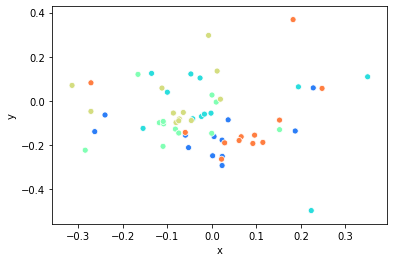

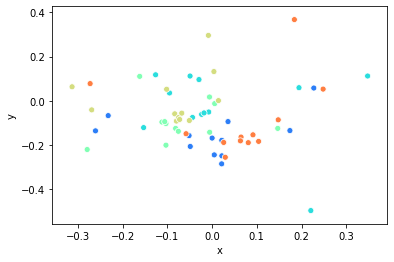

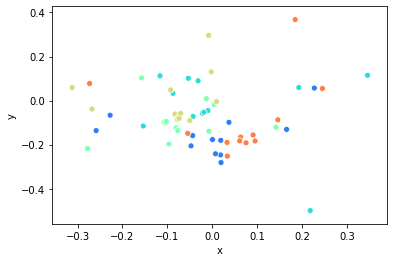

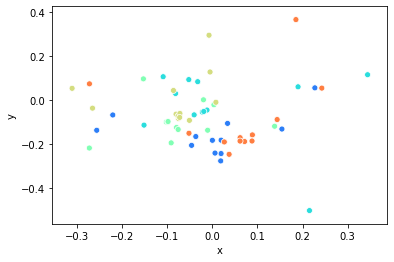

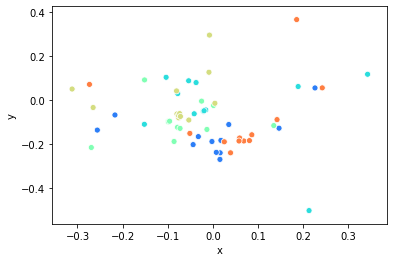

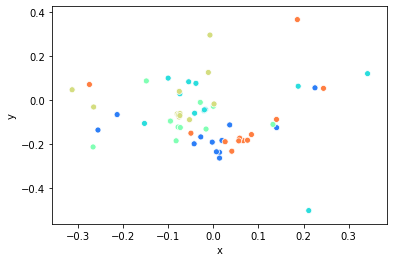

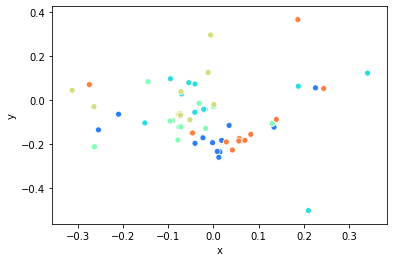

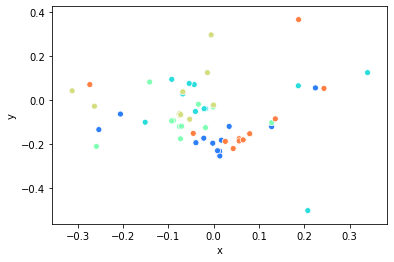

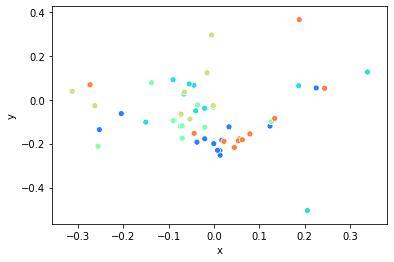

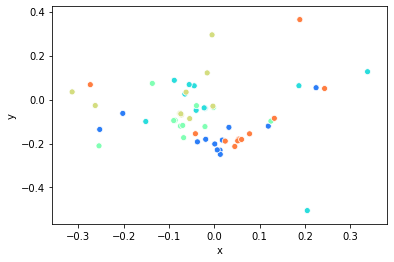

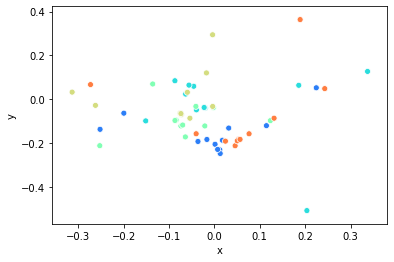

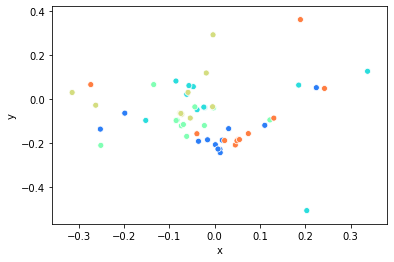

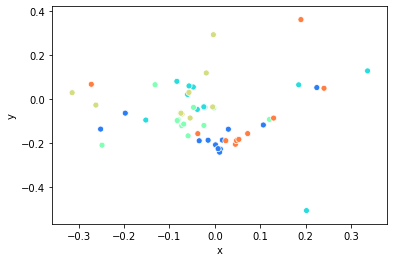

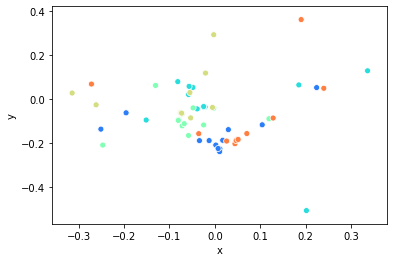

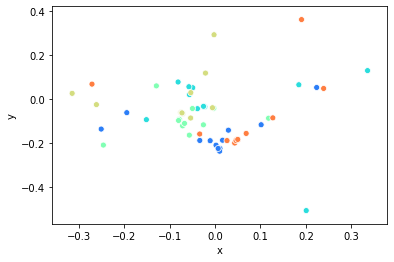

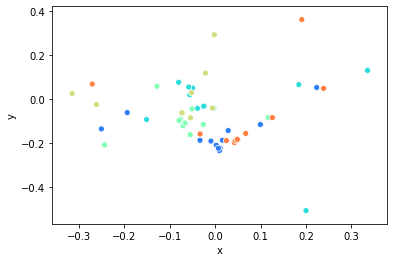

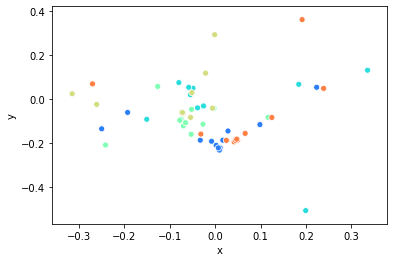

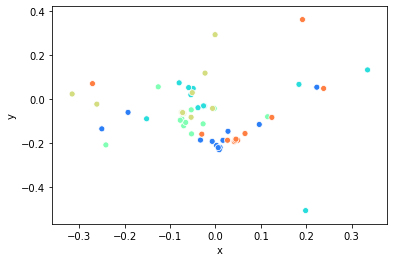

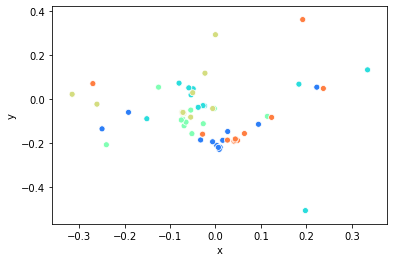

In [29]:
n_components = 2
max_epoch = 50
tol = 0.
learning_rate = 0.5
max_loss = 50.
draw_every = 2
###

nnodes = labels.node.nunique()
mat = nx.adj_matrix(G)
data = mat.data
dst = mat.indices
indptr = mat.indptr

w = np.random.rand(nnodes, n_components) - 0.5
b = np.zeros(nnodes, dtype=np.float64)
wgrad = np.ones_like(w)
bgrad = np.ones_like(b)
shuffle_idx = np.arange(dst.size)
for epoch in range(max_epoch):
    np.random.shuffle(shuffle_idx)
    lgrad = glove._glove_edges_update(
        data, dst, indptr, w, b, 
        wgrad, bgrad, shuffle_idx,
        learning_rate=learning_rate,
        max_loss=max_loss)
    # Draw result
    if epoch % draw_every == 0:
        draw_weights(w)
    if np.abs(lgrad) < tol:
        print("\n\nsuccesful!\n\n")
        break